# Visualising 1D Distribution

We'll be using the Kaggle Heart Disease UCI dataset as an example. You can find it here: https://www.kaggle.com/ronitf/heart-disease-uci


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('seaborn')


df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Histograms

The most common of all ways to show a distribution

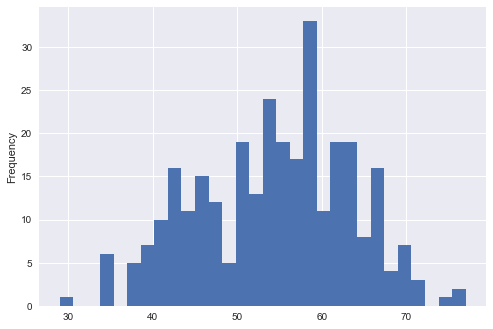

In [2]:
df.age.plot.hist(bins=30);

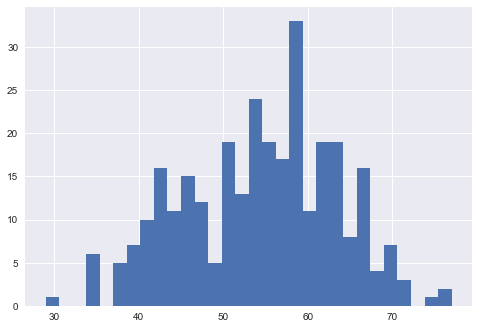

In [3]:
plt.hist(df.age, bins=30);

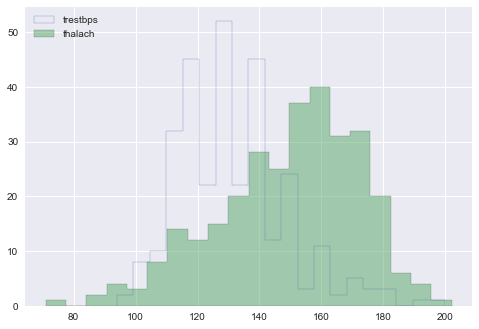

In [4]:
fig, ax = plt.subplots()
ax.hist(df.trestbps, bins=20, histtype="step", label="trestbps")
ax.hist(df.thalach, bins=20, histtype="stepfilled", label="thalach", alpha=0.5, edgecolor="k")
ax.legend();

## Box Plots

Shows mean, quartiles, IQR and outliers. IQR is inter-quartile range = (75% - 25%). Outliers are points more than 1.5 * IQR away.

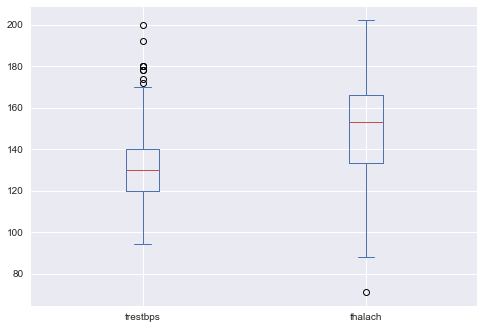

In [5]:
df[["trestbps", "thalach"]].plot.box();

In [6]:
df[["trestbps", "thalach"]].describe()

,trestbps,thalach
count,303.000000,303.000000
mean,131.623762,149.646865
std,17.538143,22.905161
min,94.000000,71.000000
25%,120.000000,133.500000
50%,130.000000,153.000000
75%,140.000000,166.000000
max,200.000000,202.000000


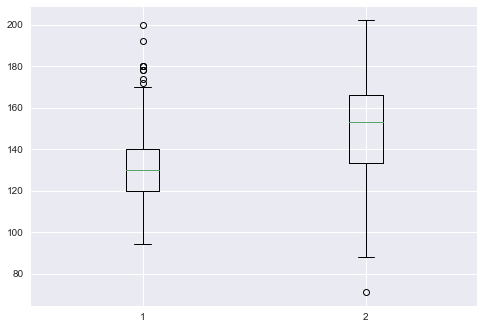

In [7]:
plt.boxplot(df[["trestbps", "thalach"]].to_numpy());

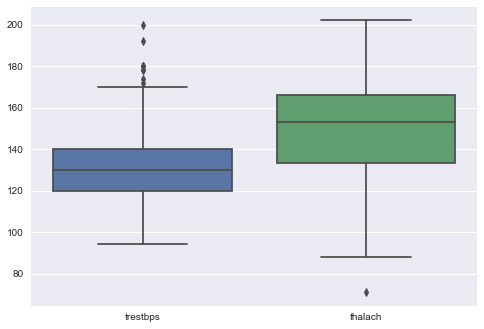

In [8]:
sb.boxplot(data=df[["trestbps", "thalach"]]);

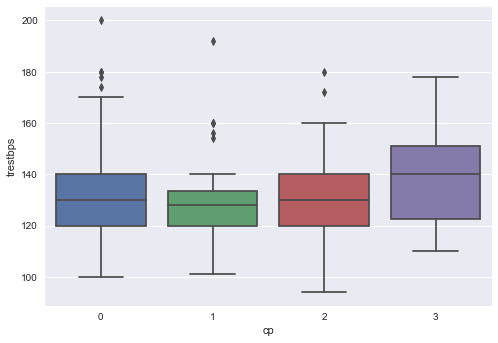

In [9]:
sb.boxplot(x="cp", y="trestbps", data=df);

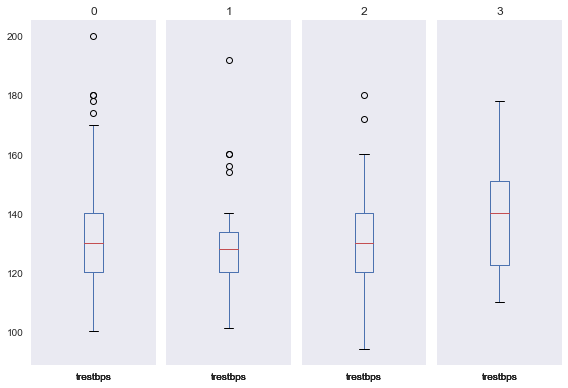

In [12]:
df.groupby("cp").boxplot(column="trestbps", sharex=True, layout=(1, 4), grid=False)
plt.tight_layout();

## Violin Plots

Like box plots... but better. Not a staple of pandas at the moment (though it has been requested):

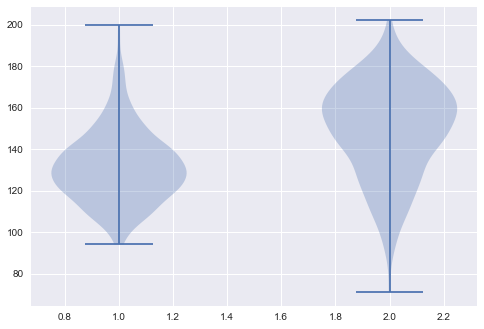

In [13]:
fig, ax = plt.subplots()
ax.violinplot(df[["trestbps", "thalach"]].to_numpy());

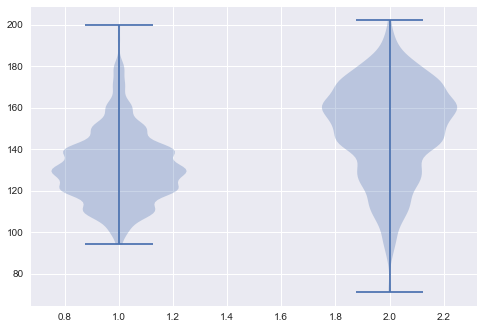

In [17]:
# Control the bandwidth to control the smoothing.
fig, ax = plt.subplots()
ax.violinplot(df[["trestbps", "thalach"]].to_numpy(), bw_method=0.2);

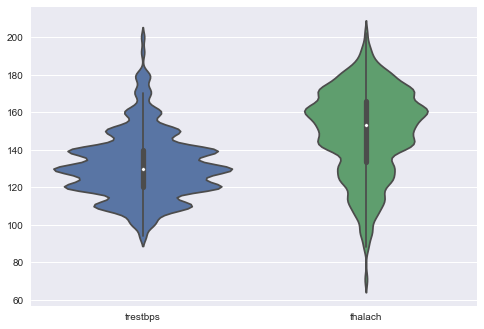

In [23]:
# seaborn has same functionality
sb.violinplot(data=df[["trestbps", "thalach"]], bw=0.15);

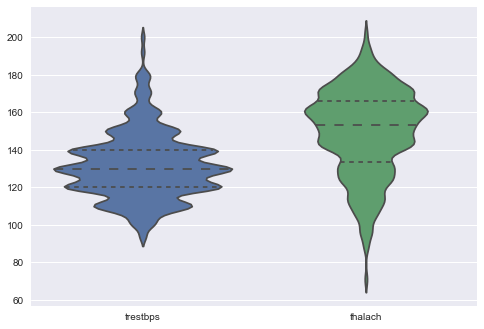

In [24]:
# we can also add the lines for median and inter quartiles with seaborn
sb.violinplot(data=df[["trestbps", "thalach"]], inner="quartile", bw=0.15);

## Bee swarm plots

If you want to go fancy, these can be fun for presentations, but less concise than other plots.

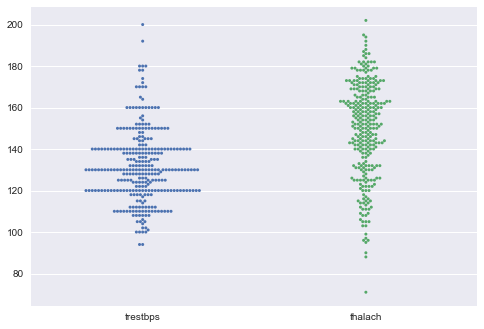

In [25]:
sb.swarmplot(data=df[["trestbps", "thalach"]], size=3);

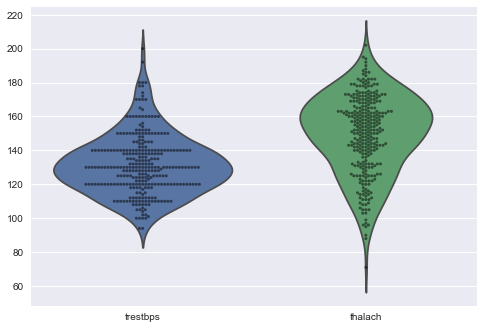

In [31]:
sb.violinplot(data=df[["trestbps", "thalach"]], inner=None);
sb.swarmplot(data=df[["trestbps", "thalach"]], size=3, color="k", alpha=0.5);
plt.savefig('combined.png', dpi=300)

Often combining this plot is the right choice. You can see here it reveals structure in the violin plot for trestbps that the KDE is smoothing over.

### Recap

* histogram
* box
* violin
* bee swarm


* Violin plots are a better way of representing distributions compared with boxplots
* If worried about smooothing with violin plots, can display underlying data with bee swarm overlay